<a href="https://colab.research.google.com/github/ioadeer/bi-bycing-ba-2021/blob/main/Prueba_2_demanda_godoy_cruz_tpot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
!pip install tpot

     |████████████████████████████████| 87 kB 3.0 MB/s 
     |████████████████████████████████| 166.7 MB 5.3 kB/s 
     |████████████████████████████████| 160 kB 49.3 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11955 sha256=12f094cf4fbafee8f9f0311f81bdd8bd003eea7b602a994cd09bef17c8e226d3
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [4]:

# Import required libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
'''
https://drive.google.com/file/d/1hNI40ftjmvS5zA7RG5ttjUSFOLCZshZx/view?usp=sharing
'''

id = '1hNI40ftjmvS5zA7RG5ttjUSFOLCZshZx'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('estacion-godoy-cruz-demanda-final.csv') 
demanda_est_gc_df = pd.read_csv('estacion-godoy-cruz-demanda-final.csv')
demanda_est_gc_df = demanda_est_gc_df.drop(['Unnamed: 0'], axis=1)
demanda_est_gc_df

,index,count,anio,nmes,ndia,wdia,hora,dia_habil,DD,FF,HORA,HUM,PNM,TEMP
0,0,3,2020,1,1,3,2,1,160,13,2,72.0,1011.4,22.0
1,1,2,2020,1,1,3,4,1,180,11,4,87.0,1011.8,20.9
2,2,1,2020,1,1,3,6,1,180,15,6,87.0,1012.1,20.5
3,3,2,2020,1,1,3,7,1,160,15,7,85.0,1013.0,20.4
4,4,2,2020,1,1,3,11,1,140,17,11,63.0,1014.4,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,7524,1,2021,6,153,3,11,1,200,13,11,73.0,1015.0,14.6
7521,7525,2,2021,6,153,3,12,1,180,15,12,65.0,1015.3,14.7
7522,7526,7,2021,6,153,3,13,1,200,9,13,56.0,1015.3,15.7
7523,7527,1,2021,6,153,3,14,1,230,11,14,42.0,1013.7,17.5


In [ ]:
demanda_est_gc_df_2 = demanda_est_gc_df.drop(columns=['index','hora'], axis=1)
demanda_est_gc_df_2 = demanda_est_gc_df_2.reset_index(drop='True')
demanda_est_gc_df_2

,count,anio,nmes,ndia,wdia,dia_habil,DD,FF,HORA,HUM,PNM,TEMP
0,3,2020,1,1,3,1,160,13,2,72.0,1011.4,22.0
1,2,2020,1,1,3,1,180,11,4,87.0,1011.8,20.9
2,1,2020,1,1,3,1,180,15,6,87.0,1012.1,20.5
3,2,2020,1,1,3,1,160,15,7,85.0,1013.0,20.4
4,2,2020,1,1,3,1,140,17,11,63.0,1014.4,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7520,1,2021,6,153,3,1,200,13,11,73.0,1015.0,14.6
7521,2,2021,6,153,3,1,180,15,12,65.0,1015.3,14.7
7522,7,2021,6,153,3,1,200,9,13,56.0,1015.3,15.7
7523,1,2021,6,153,3,1,230,11,14,42.0,1013.7,17.5


In [ ]:
pd.isnull(demanda_est_gc_df).any()

index        False
count        False
anio         False
nmes         False
ndia         False
wdia         False
hora         False
dia_habil    False
DD           False
FF           False
HORA         False
HUM          False
PNM          False
TEMP         False
dtype: bool

#1 Averiguar demanda

In [ ]:
estacion_gc_df = demanda_est_gc_df_2.rename(columns={'count':'target'})
estacion_gc_df
target_class = estacion_gc_df['target'].values
print(target_class)
estacion_gc_df = estacion_gc_df.drop(['target'], axis=1)
estacion_gc_df
estacion_gc_df.info()

[ 3  2  1 ...  7  1 10]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anio       7525 non-null   int64  
 1   nmes       7525 non-null   int64  
 2   ndia       7525 non-null   int64  
 3   wdia       7525 non-null   int64  
 4   dia_habil  7525 non-null   int64  
 5   DD         7525 non-null   int64  
 6   FF         7525 non-null   int64  
 7   HORA       7525 non-null   int64  
 8   HUM        7525 non-null   float64
 9   PNM        7525 non-null   float64
 10  TEMP       7525 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 646.8 KB


In [ ]:
estacion_new = np.vstack(estacion_gc_df.values)
estacion_new.shape

(7525, 11)

In [ ]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(estacion_gc_df.index, stratify = target_class, train_size=0.75, test_size=0.25)
training_indices.size, validation_indices.size

(5643, 1882)

In [ ]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=10, max_eval_time_mins=0.04, population_size=40)
tpot.fit(estacion_new[training_indices], target_class[training_indices])


Generation 1 - Current best internal CV score: 0.22399569065701774

Generation 2 - Current best internal CV score: 0.22505685066179196

Generation 3 - Current best internal CV score: 0.22505685066179196

Generation 4 - Current best internal CV score: 0.22505685066179196

Generation 5 - Current best internal CV score: 0.22505685066179196

Generation 6 - Current best internal CV score: 0.22665400875688646

Generation 7 - Current best internal CV score: 0.22665400875688646

Generation 8 - Current best internal CV score: 0.22665400875688646

Generation 9 - Current best internal CV score: 0.22665400875688646

Generation 10 - Current best internal CV score: 0.22877821331875947

10.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeClassifier(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=9), criter

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=None, max_eval_time_mins=0.04, max_time_mins=10,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=40,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

# 2 Averiguar Hora

In [ ]:
estacion_gc_df = demanda_est_gc_df_2.rename(columns={'HORA':'target'})
estacion_gc_df
target_class = estacion_gc_df['target'].values
print(target_class)
estacion_gc_df = estacion_gc_df.drop(['target'], axis=1)
estacion_gc_df
estacion_gc_df.info()

[ 2  4  6 ... 13 14 15]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   count      7525 non-null   int64  
 1   anio       7525 non-null   int64  
 2   nmes       7525 non-null   int64  
 3   ndia       7525 non-null   int64  
 4   wdia       7525 non-null   int64  
 5   dia_habil  7525 non-null   int64  
 6   DD         7525 non-null   int64  
 7   FF         7525 non-null   int64  
 8   HUM        7525 non-null   float64
 9   PNM        7525 non-null   float64
 10  TEMP       7525 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 646.8 KB


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
demandaTransform = mlb.fit_transform([{str(val)} for val in estacion_gc_df['count'].values])

demandaTransform

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
demandaTransform.shape

(7525, 49)

In [ ]:
estacion_gc_df_new = np.hstack((estacion_gc_df.values,demandaTransform))
estacion_gc_df_new.shape

(7525, 60)

In [26]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(estacion_gc_df.index, stratify = target_class, train_size=0.75, test_size=0.25)
training_indices.size, validation_indices.size

(4863, 1622)

In [ ]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=10, max_eval_time_mins=0.04, population_size=40)
tpot.fit(estacion_gc_df_new[training_indices], target_class[training_indices])


Generation 1 - Current best internal CV score: 0.11554158892888329

Generation 2 - Current best internal CV score: 0.11554158892888329

Generation 3 - Current best internal CV score: 0.11554158892888329

Generation 4 - Current best internal CV score: 0.11554158892888329

Generation 5 - Current best internal CV score: 0.11554158892888329

Generation 6 - Current best internal CV score: 0.11554158892888329

Generation 7 - Current best internal CV score: 0.11554158892888329

Generation 8 - Current best internal CV score: 0.1181989647525897

Generation 9 - Current best internal CV score: 0.1181989647525897

Generation 10 - Current best internal CV score: 0.1181989647525897

Generation 11 - Current best internal CV score: 0.1181989647525897

10.02 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(SelectFwe(input_matrix, alpha=0.039), bootstrap=True, 

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=None, max_eval_time_mins=0.04, max_time_mins=10,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=40,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

# =======================================================================


In [ ]:
demanda_est_gc_df_2.to_csv('/drive/My Drive/Datasets-bicing/estacion-godoy-cruz-demanda-final.csv')

In [5]:
'''
https://drive.google.com/file/d/1hNI40ftjmvS5zA7RG5ttjUSFOLCZshZx/view?usp=sharing
'''

id = '1hNI40ftjmvS5zA7RG5ttjUSFOLCZshZx'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('estacion-godoy-cruz-demanda-final.csv') 
demanda_est_gc_df = pd.read_csv('estacion-godoy-cruz-demanda-final.csv')
demanda_est_gc_df = demanda_est_gc_df.drop(['Unnamed: 0'], axis=1)
demanda_est_gc_df

,index,count,anio,nmes,ndia,wdia,hora,dia_habil,DD,FF,HORA,HUM,PNM,TEMP
0,0,3,2020,1,1,3,2,1,160,13,2,72.0,1011.4,22.0
1,1,2,2020,1,1,3,4,1,180,11,4,87.0,1011.8,20.9
2,2,1,2020,1,1,3,6,1,180,15,6,87.0,1012.1,20.5
3,3,2,2020,1,1,3,7,1,160,15,7,85.0,1013.0,20.4
4,4,2,2020,1,1,3,11,1,140,17,11,63.0,1014.4,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,7524,1,2021,6,153,3,11,1,200,13,11,73.0,1015.0,14.6
7521,7525,2,2021,6,153,3,12,1,180,15,12,65.0,1015.3,14.7
7522,7526,7,2021,6,153,3,13,1,200,9,13,56.0,1015.3,15.7
7523,7527,1,2021,6,153,3,14,1,230,11,14,42.0,1013.7,17.5


In [6]:
demanda_est_gc_df = demanda_est_gc_df.drop(['index'], axis=1)
demanda_est_gc_df

,count,anio,nmes,ndia,wdia,hora,dia_habil,DD,FF,HORA,HUM,PNM,TEMP
0,3,2020,1,1,3,2,1,160,13,2,72.0,1011.4,22.0
1,2,2020,1,1,3,4,1,180,11,4,87.0,1011.8,20.9
2,1,2020,1,1,3,6,1,180,15,6,87.0,1012.1,20.5
3,2,2020,1,1,3,7,1,160,15,7,85.0,1013.0,20.4
4,2,2020,1,1,3,11,1,140,17,11,63.0,1014.4,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,1,2021,6,153,3,11,1,200,13,11,73.0,1015.0,14.6
7521,2,2021,6,153,3,12,1,180,15,12,65.0,1015.3,14.7
7522,7,2021,6,153,3,13,1,200,9,13,56.0,1015.3,15.7
7523,1,2021,6,153,3,14,1,230,11,14,42.0,1013.7,17.5


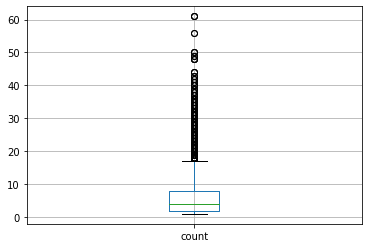

In [7]:
ax1= demanda_est_gc_df.boxplot(column='count')

In [10]:
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline

mpl.rcParams.update( mpl.rcParamsDefault ) 

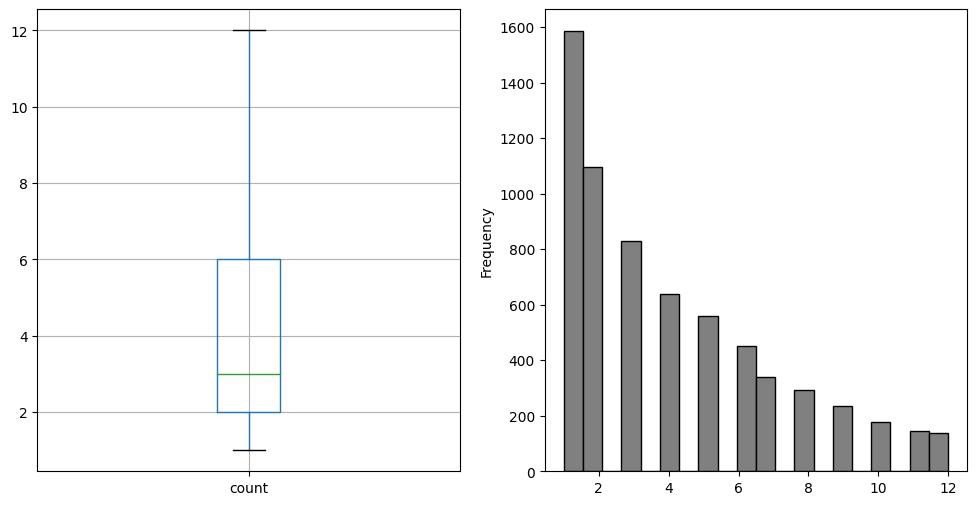

In [19]:
demanda_filtered_df = demanda_est_gc_df[demanda_est_gc_df['count'] < 13]
plt.subplot(1, 2, 1)
ax1 = demanda_filtered_df.boxplot(column='count')
plt.subplot(1, 2, 2)
ax2 = demanda_filtered_df['count'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')
plt.show()

In [48]:
demanda_filtered_df['ndemanda'] = demanda_filtered_df['count'].map(lambda x: 2 if x >= 8 else (1 if x < 8 and x >= 4 else 0 ),na_action=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
demanda_filtered_df
demanda_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6485 entries, 0 to 7524
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   count      6485 non-null   int64  
 1   anio       6485 non-null   int64  
 2   nmes       6485 non-null   int64  
 3   ndia       6485 non-null   int64  
 4   wdia       6485 non-null   int64  
 5   hora       6485 non-null   int64  
 6   dia_habil  6485 non-null   int64  
 7   DD         6485 non-null   int64  
 8   FF         6485 non-null   int64  
 9   HORA       6485 non-null   int64  
 10  HUM        6485 non-null   float64
 11  PNM        6485 non-null   float64
 12  TEMP       6485 non-null   float64
 13  ndemanda   6485 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 760.0 KB


# Analizar n demanda alta media baja

In [56]:
estacion_gc_df = demanda_filtered_df.rename(columns={'ndemanda':'target'})
estacion_gc_df
target_class = estacion_gc_df['target'].values
print(target_class)
estacion_gc_df = estacion_gc_df.drop(['target','count'], axis=1)
estacion_gc_df
estacion_gc_df.info()

[0 0 0 ... 1 0 2]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6485 entries, 0 to 7524
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anio       6485 non-null   int64  
 1   nmes       6485 non-null   int64  
 2   ndia       6485 non-null   int64  
 3   wdia       6485 non-null   int64  
 4   hora       6485 non-null   int64  
 5   dia_habil  6485 non-null   int64  
 6   DD         6485 non-null   int64  
 7   FF         6485 non-null   int64  
 8   HORA       6485 non-null   int64  
 9   HUM        6485 non-null   float64
 10  PNM        6485 non-null   float64
 11  TEMP       6485 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 658.6 KB


In [57]:
estacion_gc_df

,anio,nmes,ndia,wdia,hora,dia_habil,DD,FF,HORA,HUM,PNM,TEMP
0,2020,1,1,3,2,1,160,13,2,72.0,1011.4,22.0
1,2020,1,1,3,4,1,180,11,4,87.0,1011.8,20.9
2,2020,1,1,3,6,1,180,15,6,87.0,1012.1,20.5
3,2020,1,1,3,7,1,160,15,7,85.0,1013.0,20.4
4,2020,1,1,3,11,1,140,17,11,63.0,1014.4,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7520,2021,6,153,3,11,1,200,13,11,73.0,1015.0,14.6
7521,2021,6,153,3,12,1,180,15,12,65.0,1015.3,14.7
7522,2021,6,153,3,13,1,200,9,13,56.0,1015.3,15.7
7523,2021,6,153,3,14,1,230,11,14,42.0,1013.7,17.5


In [58]:
estacion_gc_df = estacion_gc_df.reset_index(drop='True')
estacion_gc_df

,anio,nmes,ndia,wdia,hora,dia_habil,DD,FF,HORA,HUM,PNM,TEMP
0,2020,1,1,3,2,1,160,13,2,72.0,1011.4,22.0
1,2020,1,1,3,4,1,180,11,4,87.0,1011.8,20.9
2,2020,1,1,3,6,1,180,15,6,87.0,1012.1,20.5
3,2020,1,1,3,7,1,160,15,7,85.0,1013.0,20.4
4,2020,1,1,3,11,1,140,17,11,63.0,1014.4,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6480,2021,6,153,3,11,1,200,13,11,73.0,1015.0,14.6
6481,2021,6,153,3,12,1,180,15,12,65.0,1015.3,14.7
6482,2021,6,153,3,13,1,200,9,13,56.0,1015.3,15.7
6483,2021,6,153,3,14,1,230,11,14,42.0,1013.7,17.5


In [61]:
estacion_new = np.vstack(estacion_gc_df.values)
estacion_new.shape

(6485, 12)

In [62]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(estacion_gc_df.index, stratify = target_class, train_size=0.75, test_size=0.25)
training_indices.size, validation_indices.size

(4863, 1622)

In [63]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=10, max_eval_time_mins=0.04, population_size=40)
tpot.fit(estacion_new[training_indices], target_class[training_indices])


Generation 1 - Current best internal CV score: 0.635412939489678

Generation 2 - Current best internal CV score: 0.6378805949949036

Generation 3 - Current best internal CV score: 0.6378805949949036

Generation 4 - Current best internal CV score: 0.6378805949949036

Generation 5 - Current best internal CV score: 0.6378805949949036

Generation 6 - Current best internal CV score: 0.6378805949949036

Generation 7 - Current best internal CV score: 0.640552108577688

Generation 8 - Current best internal CV score: 0.640552108577688

Generation 9 - Current best internal CV score: 0.6417877338340967

Generation 10 - Current best internal CV score: 0.6430195526118787

Generation 11 - Current best internal CV score: 0.6430195526118787

Generation 12 - Current best internal CV score: 0.6430195526118787

Generation 13 - Current best internal CV score: 0.6430195526118787

10.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. W

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=None, max_eval_time_mins=0.04, max_time_mins=10,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=40,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)